___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [90]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train_v, x_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [4]:
# Print the shape of the data
print("Training data shape:", x_train_v.shape) 
print("Training labels shape:", y_train_v.shape) 
print("Validation data shape:",x_val.shape) 
print("Validation labels shape:",y_val.shape) 
print("Testing data shape:", x_test.shape)  
print("Testing labels shape:", y_test.shape) 

Training data shape: (54000, 28, 28)
Training labels shape: (54000,)
Validation data shape: (6000, 28, 28)
Validation labels shape: (6000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [5]:
class_labels = set(y_train_v)
print("Class Labels:", class_labels)

Class Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


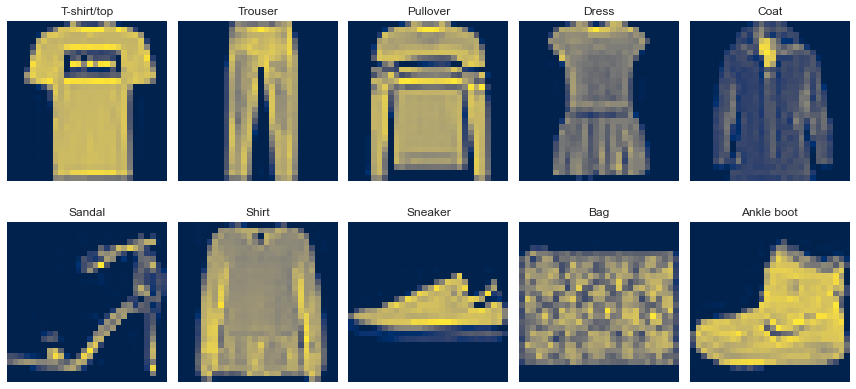

In [9]:
# Define labels for each class
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot sample images from each class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    img = x_train[y_train == i][0]
    ax.imshow(img, cmap='cividis')
    ax.set_title(classes[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

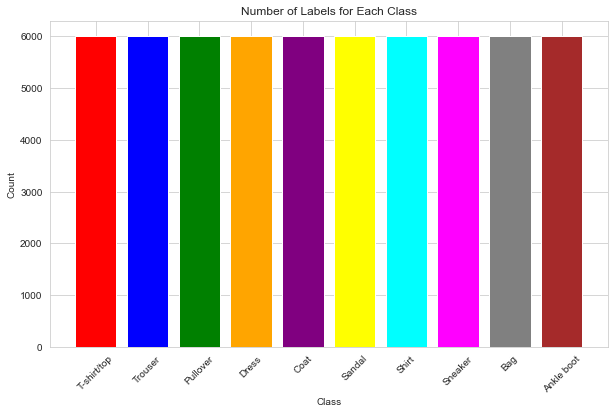

In [11]:
#visualize the number of labels for each class
class_counts = np.bincount(y_train)
colors = ['red', 'blue', 'green', 'orange', 'purple',
          'yellow', 'cyan', 'magenta', 'gray', 'brown']

# Plot the number of labels per class using a bar chart with colored bars
plt.figure(figsize=(10, 6))
plt.bar(classes, class_counts, color=colors)
plt.title("Number of Labels for Each Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [14]:
#Class Distribution
#how many samples belong to each class?
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

In [15]:
Counter(y_test)

Counter({9: 1000,
         2: 1000,
         1: 1000,
         6: 1000,
         4: 1000,
         5: 1000,
         7: 1000,
         3: 1000,
         8: 1000,
         0: 1000})

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

<function matplotlib.pyplot.show(close=None, block=None)>

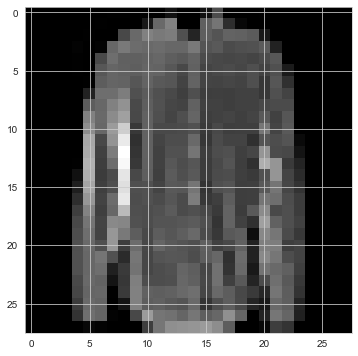

In [16]:
# Visualize the first image from the training dataset
plt.imshow(x_train_v[1], cmap='gray')
plt.show

In [17]:
y_train_v[1]

0

<function matplotlib.pyplot.show(close=None, block=None)>

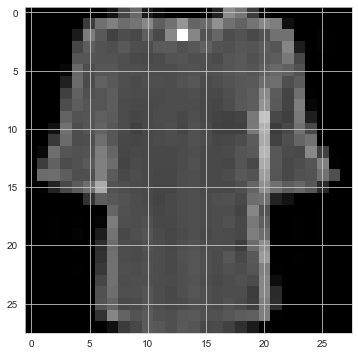

In [18]:
plt.imshow(x_train_v[2], cmap='gray')
plt.show

In [19]:
y_train_v[2]

6

<function matplotlib.pyplot.show(close=None, block=None)>

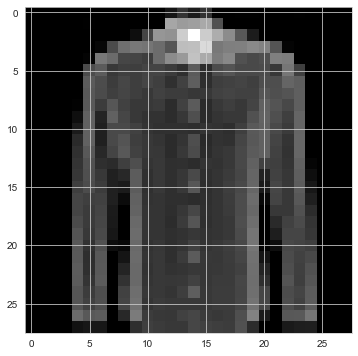

In [20]:
plt.imshow(x_train_v[20], cmap='gray')
plt.show

In [21]:
y_train_v[20]

6

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [22]:
x_train.max()

255

In [23]:
x_train_v.max()

255

In [24]:
x_val.max()

255

In [25]:
x_test.max()

255

In [26]:
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_train /= 255
X_test /= 255

In [27]:
X_train_v = x_train_v.astype("float32")
X_val = x_val.astype("float32")
X_train_v /= 255
X_val /= 255

In [30]:
X_train.max()

1.0

In [31]:
X_test.max()

1.0

In [28]:
X_train_v.max()

1.0

In [32]:
X_val.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [33]:
X_train_vs = np.expand_dims(X_train_v, -1)
X_val_s = np.expand_dims(X_val, -1)

In [34]:
X_train_s = np.expand_dims(X_train, -1)
X_test_s = np.expand_dims(X_test, -1)

In [37]:
X_train_vs.shape

(54000, 28, 28, 1)

In [36]:
X_val_s.shape

(6000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [38]:
y_train_vc = to_categorical(y_train_v)
y_val_vc = to_categorical(y_val)

In [39]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [40]:
y_train_vc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
y_val_vc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Modeling

### Model 1

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import tensorflow as tf

# Create the model
model = Sequential()

# Add the layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 23328)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2986112   
                                                                 
 dense_5 (Dense)             (None, 120)               15480     
                                                                 
 dense_6 (Dense)             (None, 10)                1210      
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [54]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min", verbose=1, patience=25,
                                           restore_best_weights=True)

In [55]:
history = model.fit(X_train_vs, y_train_vc, batch_size=32, epochs=50, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/50
1688/1688 [==============================] - 55s 32ms/step - loss: 1.4785 - accuracy: 0.6858 - val_loss: 0.8672 - val_accuracy: 0.7427
Epoch 2/50
1688/1688 [==============================] - 52s 31ms/step - loss: 0.8481 - accuracy: 0.7504 - val_loss: 0.8544 - val_accuracy: 0.7267
Epoch 3/50
1688/1688 [==============================] - 50s 30ms/step - loss: 0.7976 - accuracy: 0.7652 - val_loss: 0.7415 - val_accuracy: 0.7735
Epoch 4/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.7721 - accuracy: 0.7728 - val_loss: 0.7262 - val_accuracy: 0.7757
Epoch 5/50
1688/1688 [==============================] - 58s 34ms/step - loss: 0.7439 - accuracy: 0.7846 - val_loss: 0.7752 - val_accuracy: 0.7723
Epoch 6/50
1688/1688 [==============================] - 51s 30ms/step - loss: 0.7010 - accuracy: 0.7998 - val_loss: 0.7059 - val_accuracy: 0.8010
Epoch 7/50
1688/1688 [==============================] - 51s 30ms/step - loss: 0.6820 - accuracy: 0.8075 - val_loss: 0.6424 -

**TASK 7: Plot values of metrics you used in your model.**

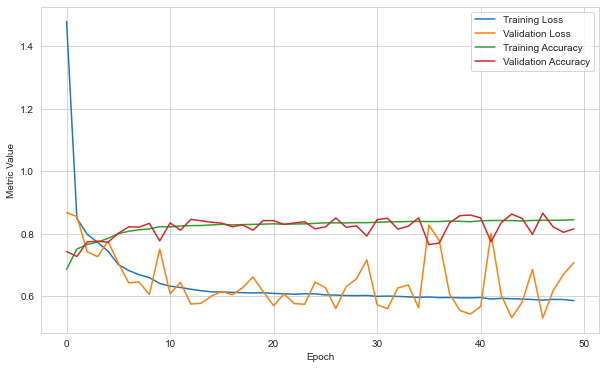

In [56]:
# Plot the metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [57]:
# Make predictions on the test set
y_pred = model.predict(X_test_s)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 4ms/step


In [61]:
# Convert one-hot encoded labels to categorical labels
y_test_classes = np.argmax(y_test_c, axis=1)

In [62]:
y_test_c

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
y_test_c[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [65]:
y_pred[0]

9

In [66]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8044
Precision: 0.8345531155822778
Recall: 0.8044
F1-Score: 0.8066244007855585


In [67]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[700   0 177  11  15   5  90   0   2   0]
 [  2 935  13  15  25   2   4   0   0   4]
 [  3   1 896   0  84   1  15   0   0   0]
 [ 25   9 173 704  65   1  20   0   1   2]
 [  0   0 164   7 799   0  30   0   0   0]
 [  0   0   5   0   0 968   2   6   1  18]
 [104   0 268   9 166   0 452   0   1   0]
 [  0   0   0   0   0 107   0 770   0 123]
 [  0   0  48   4  44   6  45   2 846   5]
 [  0   0   2   0   0   8   3  13   0 974]]


In [68]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1000
           1       0.99      0.94      0.96      1000
           2       0.51      0.90      0.65      1000
           3       0.94      0.70      0.80      1000
           4       0.67      0.80      0.73      1000
           5       0.88      0.97      0.92      1000
           6       0.68      0.45      0.54      1000
           7       0.97      0.77      0.86      1000
           8       0.99      0.85      0.91      1000
           9       0.87      0.97      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.83      0.80      0.81     10000
weighted avg       0.83      0.80      0.81     10000



**Conclusion of model-1**

In conclusion, the model-1 architecture with 50 epochs of training, implementing EarlyStopping to prevent overfitting. The model achieved **an accuracy of 84.44% on the training set**, demonstrating its ability to learn and generalize. **On the validation set the model achieved an accuracy of 81.52%**, Although these values indicate a reasonable level of accuracy. The application of EarlyStopping ensured that the model's performance was optimized by stopping training when necessary. 

further improvements may be needed to enhance the model's capability in accurately classifying fashion items. With continued refinement, the model holds potential for various fashion-related applications.

The model-1 can effectively classify fashion items with an accuracy of approximately **81-84%.**

### Model -2

In [91]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 27, 27, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)       

In [94]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [95]:
history = model.fit(X_train_vs, y_train_vc, batch_size=32, epochs=70, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/70
1688/1688 [==============================] - 125s 74ms/step - loss: 0.4130 - accuracy: 0.8518 - val_loss: 0.2744 - val_accuracy: 0.9010
Epoch 2/70
1688/1688 [==============================] - 123s 73ms/step - loss: 0.3248 - accuracy: 0.8841 - val_loss: 0.2329 - val_accuracy: 0.9147
Epoch 3/70
1688/1688 [==============================] - 125s 74ms/step - loss: 0.2843 - accuracy: 0.8969 - val_loss: 0.2128 - val_accuracy: 0.9190
Epoch 4/70
1688/1688 [==============================] - 124s 74ms/step - loss: 0.2599 - accuracy: 0.9051 - val_loss: 0.2182 - val_accuracy: 0.9205
Epoch 5/70
1688/1688 [==============================] - 99s 59ms/step - loss: 0.2404 - accuracy: 0.9119 - val_loss: 0.2142 - val_accuracy: 0.9187
Epoch 6/70
1688/1688 [==============================] - 99s 59ms/step - loss: 0.2268 - accuracy: 0.9159 - val_loss: 0.1940 - val_accuracy: 0.9287
Epoch 7/70
1688/1688 [==============================] - 103s 61ms/step - loss: 0.2140 - accuracy: 0.9199 - val_loss: 0.1

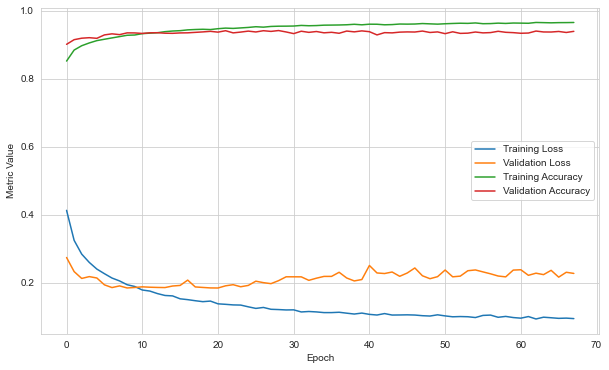

In [97]:
# Plot the metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

In [98]:
# Make predictions on the test set
y_pred = model.predict(X_test_s)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 7ms/step


In [99]:
y_test_classes = np.argmax(y_test_c, axis=1)

In [100]:
y_test_c

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [101]:
y_test_c[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [103]:
y_test_c[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [105]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9289
Precision: 0.9288745317904453
Recall: 0.9289
F1-Score: 0.9286132930401003


In [106]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.90      0.89      1000
           3       0.94      0.92      0.93      1000
           4       0.86      0.91      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.82      0.75      0.79      1000
           7       0.97      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



## Prediction

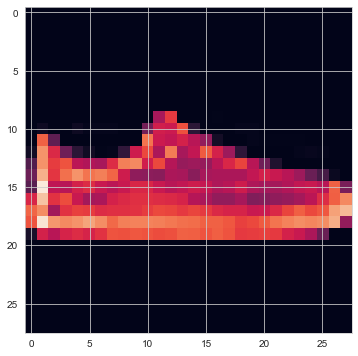

In [108]:
plt.imshow(X_test_s[12])
plt.show()

In [109]:
y_test[12]

7

In [110]:
classes[y_test[12]]

'Sneaker'

1/1 [==============================] - 0s 125ms/step


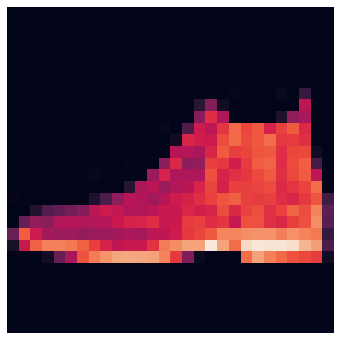

Sample 1
Predicted value: Ankle boot ( 9 )
Actual value: Ankle boot ( 9 )
-------------------------------
1/1 [==============================] - 0s 17ms/step


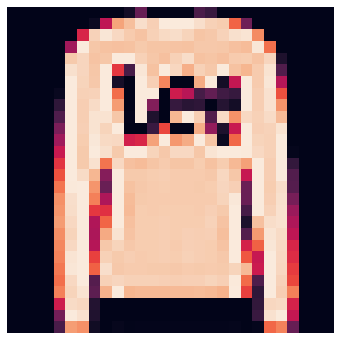

Sample 2
Predicted value: Pullover ( 2 )
Actual value: Pullover ( 2 )
-------------------------------
1/1 [==============================] - 0s 16ms/step


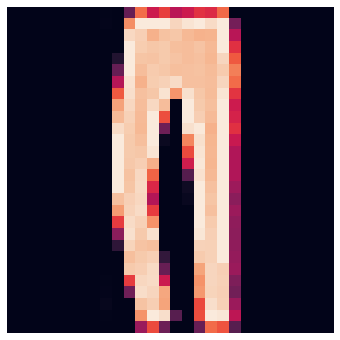

Sample 3
Predicted value: Trouser ( 1 )
Actual value: Trouser ( 1 )
-------------------------------
1/1 [==============================] - 0s 16ms/step


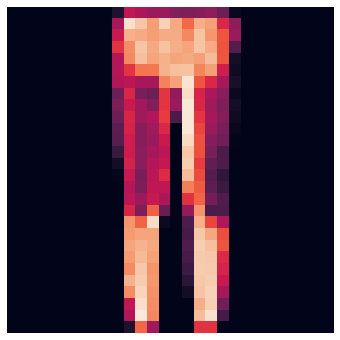

Sample 4
Predicted value: Trouser ( 1 )
Actual value: Trouser ( 1 )
-------------------------------
1/1 [==============================] - 0s 17ms/step


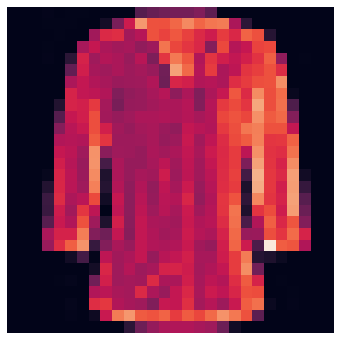

Sample 5
Predicted value: Shirt ( 6 )
Actual value: Shirt ( 6 )
-------------------------------
1/1 [==============================] - 0s 17ms/step


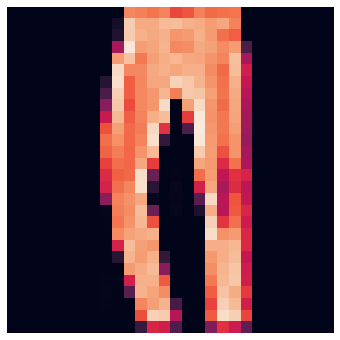

Sample 6
Predicted value: Trouser ( 1 )
Actual value: Trouser ( 1 )
-------------------------------
1/1 [==============================] - 0s 16ms/step


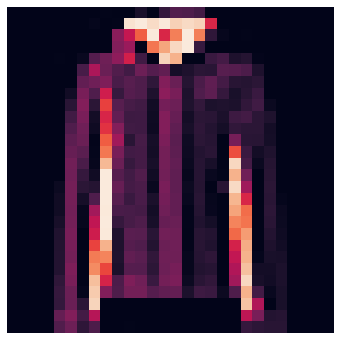

Sample 7
Predicted value: Coat ( 4 )
Actual value: Coat ( 4 )
-------------------------------
1/1 [==============================] - 0s 17ms/step


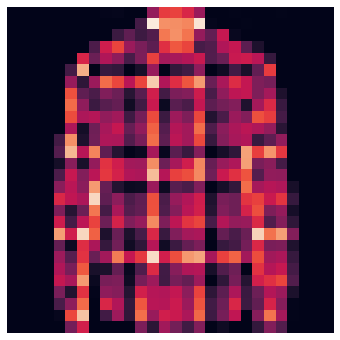

Sample 8
Predicted value: Shirt ( 6 )
Actual value: Shirt ( 6 )
-------------------------------
1/1 [==============================] - 0s 16ms/step


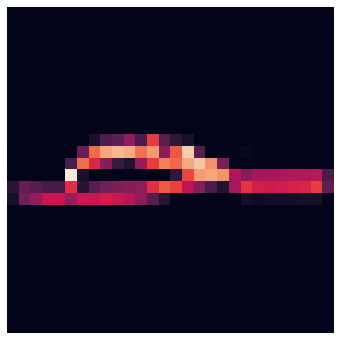

Sample 9
Predicted value: Sandal ( 5 )
Actual value: Sandal ( 5 )
-------------------------------
1/1 [==============================] - 0s 17ms/step


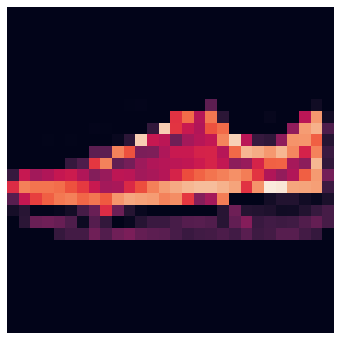

Sample 10
Predicted value: Sneaker ( 7 )
Actual value: Sneaker ( 7 )
-------------------------------


In [107]:
num_samples = 10  # Number of samples to display and print predictions for
for i in range(num_samples):
    predicted_value = model.predict(np.expand_dims(X_test_s[i], 0))
    predicted_class = np.argmax(predicted_value)
    
    # Display the image
    plt.imshow(X_test_s[i])
    plt.axis('off')
    plt.show()
    
    print('Sample', i+1)
    print('Predicted value:', classes[predicted_class], '(', predicted_class, ')')
    print('Actual value:', classes[y_test[i]], '(', y_test[i], ')')
    print('-------------------------------')

**Conclusion of model-2**

In conclusion, the model-2 architecture with **70 epochs** and Dropout regularization achieved results better than Model-1. With **an accuracy of 92.89%**, it demonstrates effective classification of fashion items. The precision, recall, and F1-Score values of approximately 92.89% further validate the model's performance. These metrics indicate a good balance between correctly identifying positive instances and minimizing false positives and false negatives. Overall, the model shows strong potential for accurately categorizing fashion items

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___